Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

# Loading data

In [2]:
#define file paths.

import os

daisy_path = "flowers/daisy/"
dandelion_path = "flowers/dandelion/"
rose_path = "flowers/rose/"
sunflower_path = "flowers/sunflower/"
tulip_path = "flowers/tulip/"

Defining a function that will:

    1- Iterate through the data, append the images in one list and label all the images.
    2- Resize the images to 128 x 128.

In [3]:
from os import listdir
import cv2



img_data = []
labels = []

size = 128,128
def iter_images(images,directory,size,label):
    try:
        for i in range(len(images)):
            img = cv2.imread(directory + images[i])
            img = cv2.resize(img,size)
            img_data.append(img)
            labels.append(label)
    except:
        pass

iter_images(listdir(daisy_path),daisy_path,size,0)
iter_images(listdir(dandelion_path),dandelion_path,size,1)
iter_images(listdir(rose_path),rose_path,size,2)
iter_images(listdir(sunflower_path),sunflower_path,size,3)
iter_images(listdir(tulip_path),tulip_path,size,4)

In [4]:
len(img_data),len(labels)

(4323, 4323)

# Resizing an image in tensorflow

In [39]:
img_data[0].shape

(128, 128, 3)

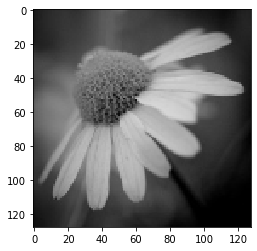

In [43]:
plt.imshow(img_data[10], interpolation='nearest')
plt.show()

In [55]:
resized_image = tf.image.resize(img_data[10], [60,60], method='nearest')

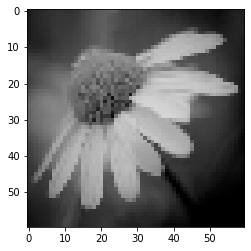

In [56]:
plt.imshow(resized_image, interpolation='nearest')
plt.show()

# Converting data into numpy arrays to feed it to our model

In [5]:
import numpy as np
data = np.asarray(img_data)

#div by 255
data = data / 255.0

labels = np.asarray(labels)

In [6]:
data.shape,labels.shape

((4323, 128, 128, 3), (4323,))

# Splitting data

In [7]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.40, shuffle= True)

# Defining & Training Models

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

model = Sequential()
model.add(Conv2D(16, (2,2),input_shape=(128, 128, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32, (2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(5,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

batch_size = 128
epochs = 30
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Epoch 1/30
21/21 [==============================] - 20s 962ms/step - loss: 1.5975 - accuracy: 0.3779 - val_loss: 1.2314 - val_accuracy: 0.4688
Epoch 2/30
21/21 [==============================] - 17s 830ms/step - loss: 1.1016 - accuracy: 0.5426 - val_loss: 1.1395 - val_accuracy: 0.5341
Epoch 3/30
21/21 [==============================] - 18s 842ms/step - loss: 0.9625 - accuracy: 0.6217 - val_loss: 1.1613 - val_accuracy: 0.5191
Epoch 4/30
21/21 [==============================] - 18s 835ms/step - loss: 0.8824 - accuracy: 0.6556 - val_loss: 1.1525 - val_accuracy: 0.5353
Epoch 5/30
21/21 [==============================] - 19s 888ms/step - loss: 0.7541 - accuracy: 0.7266 - val_loss: 1.1698 - val_accuracy: 0.5532
Epoch 6/30
21/21 [==============================] - 18s 859ms/step - loss: 0.6509 - accuracy: 0.7771 - val_loss: 1.0331 - val_accuracy: 0.6012
Epoch 7/30
21/21 [==============================] - 21s 991ms/step - loss: 0.5559 - accuracy: 0.8214 - val_loss: 1.0387 - val_accuracy: 0.6064

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

model2 = Sequential()
model2.add(Conv2D(16, (2,2),input_shape=(128, 128, 3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.4))

model2.add(Conv2D(32, (2,2),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.4))

model2.add(Flatten())

model2.add(Dense(64,activation='relu'))
model2.add(Dense(5,activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

batch_size = 128
epochs = 30
model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Epoch 1/30
21/21 [==============================] - 24s 1s/step - loss: 2.2589 - accuracy: 0.2561 - val_loss: 1.5711 - val_accuracy: 0.3214
Epoch 2/30
21/21 [==============================] - 22s 1s/step - loss: 1.4910 - accuracy: 0.3043 - val_loss: 1.5457 - val_accuracy: 0.3173
Epoch 3/30
21/21 [==============================] - 22s 1s/step - loss: 1.4354 - accuracy: 0.3344 - val_loss: 1.5118 - val_accuracy: 0.3387
Epoch 4/30
21/21 [==============================] - 22s 1s/step - loss: 1.3688 - accuracy: 0.3637 - val_loss: 1.4606 - val_accuracy: 0.3908
Epoch 5/30
21/21 [==============================] - 22s 1s/step - loss: 1.3184 - accuracy: 0.3783 - val_loss: 1.4043 - val_accuracy: 0.4145
Epoch 6/30
21/21 [==============================] - 22s 1s/step - loss: 1.2721 - accuracy: 0.4107 - val_loss: 1.3889 - val_accuracy: 0.4162
Epoch 7/30
21/21 [==============================] - 22s 1s/step - loss: 1.2486 - accuracy: 0.4574 - val_loss: 1.3546 - val_accuracy: 0.4329
Epoch 8/30
21/21 [==

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras import regularizers

model3 = Sequential()
model3.add(Conv2D(16, (2,2), input_shape=(128, 128, 3),activation='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))


model3.add(Conv2D(32, (2,2),activation='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))


model3.add(Flatten())

model3.add(Dense(128, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model3.add(Dense(5,activation='softmax'))

model3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

batch_size = 128
epochs = 30
model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Epoch 1/30
21/21 [==============================] - 20s 930ms/step - loss: 2.3606 - accuracy: 0.2676 - val_loss: 1.6251 - val_accuracy: 0.3844
Epoch 2/30
21/21 [==============================] - 19s 921ms/step - loss: 1.4731 - accuracy: 0.4520 - val_loss: 1.4084 - val_accuracy: 0.4948
Epoch 3/30
21/21 [==============================] - 18s 878ms/step - loss: 1.2637 - accuracy: 0.5580 - val_loss: 1.2930 - val_accuracy: 0.5428
Epoch 4/30
21/21 [==============================] - 19s 882ms/step - loss: 1.1517 - accuracy: 0.6082 - val_loss: 1.2444 - val_accuracy: 0.5474
Epoch 5/30
21/21 [==============================] - 18s 880ms/step - loss: 1.0799 - accuracy: 0.6348 - val_loss: 1.2099 - val_accuracy: 0.5913
Epoch 6/30
21/21 [==============================] - 19s 882ms/step - loss: 0.9605 - accuracy: 0.7192 - val_loss: 1.2019 - val_accuracy: 0.5855
Epoch 7/30
21/21 [==============================] - 19s 886ms/step - loss: 0.8954 - accuracy: 0.7366 - val_loss: 1.1640 - val_accuracy: 0.6127

# Preferred Model:


The first model showed the best results so we will use it for predictions

# Evaluation

In [31]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

In [63]:
print("Test Loss:", test_loss)
print("Test Accuracy:","%.2f" % round(test_accuracy * 100, 2), "%")

Test Loss: 1.8808640241622925
Test Accuracy: 60.35 %


# Predictions

In [36]:
pred = model.predict_classes(x_test[:10])

for i in range(len(pred)):
    print(pred[i],'==>',y_test[i])

1 ==> 0
4 ==> 4
4 ==> 4
1 ==> 1
1 ==> 1
2 ==> 4
1 ==> 1
0 ==> 0
4 ==> 0
0 ==> 1
